In [1]:
import networkx as nx
import numpy as np
%matplotlib inline

In [2]:
#function to create GN benchmark graph with given expected value in-partition edges
def create_GN_benchmark_graph(k_in):
    #calculate edge probabilities
    k_out=16-k_in
    p=k_in/31.0
    q=k_out/96.0

    #create graph/partitions with nodes
    g=nx.Graph()
    for j in xrange(1,5):
        nodes=[j*100+i for i in xrange(32)]
        g.add_nodes_from(nodes)

    #add intra partition edges
    #loop over partitions
    for k in xrange(1,5):
        # loop over nodes
        for i in xrange(32):
            # loop over nodes higher than i
            # to avoid revisiting an edge
            # note: xrange gives different result than range here
            for j in range(i+1,32):
                if np.random.random() < p:
                    g.add_edge(k*100+i,k*100+j)

    #add cross partition edges
    #loop over partitions
    for k1 in xrange(1,5):
        #loop over partitions higher than k1
        # to avoid revisiting an edge
        for k2 in range(k1+1,5):
            if (k1!=k2):
                #no need to worry about revisiting now
                for i in xrange(32):
                    for j in xrange(32):
                        if np.random.random() < q:
                            g.add_edge(k1*100+i,k2*100+j)

    return g

def general_fvcc(partition,real_partition):
    """
    Evaluate a clustertin in regard to a real clustering with the fvcc metric.
    
    input is the igraph output for two clusterings.
    
    From Newman's article: (Fast algorithm for detecting community structure in networks)
    
        The criterion for deciding correct classification is as follows.
        We find the largest set of vertices that are grouped together by 
        the algorithm in each of the four known communities. If the algorithm
        puts two or more of these sets in the same group, then all vertices 
        in those sets are considered incorrectly classi- fied. Otherwise, 
        they are considered correctly classified. All other vertices not in
        the largest sets are considered incorrectly classified.
        
    """
    #get groups in the original clusters
    real_clusters=dict()
    for cluster,i in zip(real_partition,xrange(len(real_partition))):
        if real_clusters.has_key(cluster):
            real_clusters[cluster].append(i)
        else:
            real_clusters[cluster]=[i]    
    
    #get largest groups for each original group
    groups=dict()
    for cluster,nodes in real_clusters.iteritems():
        groups[cluster]=get_largest_group([partition[i] for i in nodes])
        
    #add up sizes and check overlapping
    correct_count=0
    for i in real_clusters.keys():
        #check for overlapping
        correct=True
        for j in real_clusters.keys():
            if i!=j and groups[i][0]==groups[j][0] :
                correct=False
        
        #sum if correct
        if correct:
            correct_count+=groups[i][1]
            
    fvcc=float(correct_count)/len(partition)
    return fvcc

def fraction_of_vertices_correctly_classified(partition):
    '''
    function to evaluate a partition
    
    input is the igraph output
    
    From Newman's article: (Fast algorithm for detecting community structure in networks)
    
        The criterion for deciding correct classification is as follows.
        We find the largest set of vertices that are grouped together by 
        the algorithm in each of the four known communities. If the algorithm
        puts two or more of these sets in the same group, then all vertices 
        in those sets are considered incorrectly classi- fied. Otherwise, 
        they are considered correctly classified. All other vertices not in
        the largest sets are considered incorrectly classified.
        
    '''
    #generate true partititon
    real_part=[]
    for i in xrange(4):
        for j in xrange(32):
            real_part.append(i)
            
    #compare partition to true partition
    fvcc=general_fvcc(partition,real_part)
    return fvcc


from collections import Counter
def get_largest_group(input_list):
    '''
    function to calculate largest group and its count
    '''
    group_counts=Counter(input_list)
    max_group_count=max(group_counts.values())
    group=group_counts.keys()[argmax(group_counts.values())]
    return group,max_group_count


def argmax(in_list):
    return in_list.index(max(in_list)) 

In [3]:
cols=['red','blue','green','yellow']
node_colors=[]
for i in xrange(4):
    c=cols[i]
    for j in xrange(32):
        node_colors.append(c)

/home/ribli/tools/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/ribli/tools/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


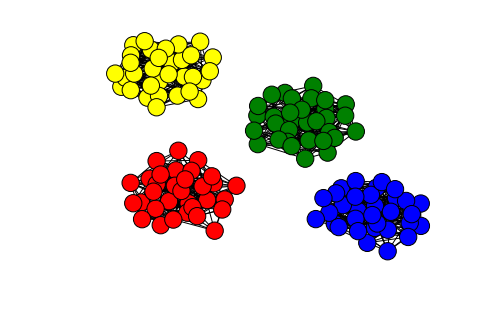

In [4]:
nx.draw_graphviz(create_GN_benchmark_graph(k_in=16),node_color=node_colors)

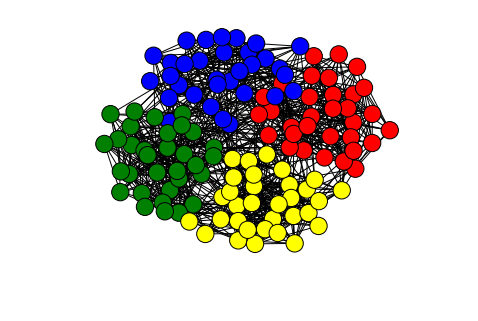

In [5]:
nx.draw_graphviz(create_GN_benchmark_graph(k_in=12),node_color=node_colors)

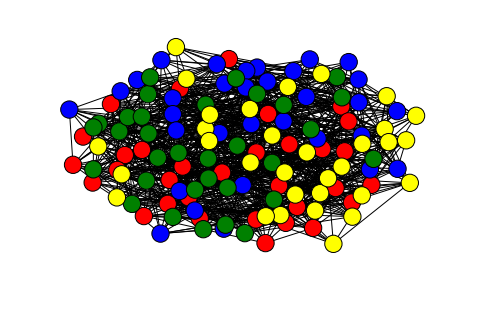

In [6]:
nx.draw_graphviz(create_GN_benchmark_graph(k_in=6),node_color=node_colors)

#### Check the degree histogram

In [7]:
hist=nx.degree_histogram(create_GN_benchmark_graph(k_in=10))
for i,val in zip(xrange(len(hist)),hist):
    print i,val

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 2
10 1
11 7
12 8
13 7
14 7
15 14
16 15
17 22
18 16
19 12
20 4
21 3
22 3
23 3
24 2
25 0
26 0
27 0
28 1
29 0
30 1
